Import necessary packages.

In [3]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [4]:
### NOTE: it is important here to further declare these variables to be nonzero and positive (otherwise sympy cannot find solution for the FOCs)
#    Thanks to Abhi Agarwal for discovering this trick
q1, q2, p1, p2, y, ubar, rho, sigma = symbols('q1 q2 p1 p2 y \overline{U} rho sigma', nonzero=True, positive=True)

# 1. Plotting demand and Engle curves

## The standard utility max problem

Given the utility maximization problem with CES utility function
\begin{align}
    & \max_{q_1,q_2}\quad u(q_1,q_2) = (q_1^{\rho} + q_2^{\rho})^{\frac{1}{\rho}} \\
    \text{s.t.}\quad & p_1 q_1 + p_2 q_2 = y
\end{align}

the derived demands are (see earlier video on CES utility function for the solution process)
\begin{align}
    q_1^* &= \frac{p_1^{\sigma}}{p_1^{1+\sigma} + p_2^{1+\sigma}} y \\
    q_2^* &= \frac{p_2^{\sigma}}{p_1^{1+\sigma} + p_2^{1+\sigma}} y
\end{align}
where $\sigma = -\frac{1}{1-\rho}$.

### Question: plotting demand curves (assuming $\rho = 1/2$, i.e., $\sigma = -2$)
1. try to plot a demand curve for $q_1^*$, make necessary assumptions about the values of the exogenous variables as you need.
1. try to compare two demand curves as $y$ changes. 
1. try to compare two demand curves as $p_2$ chnages.

Step 1: inverse the demand. 

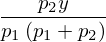

In [5]:
# define value of sigma
sigma = -2

# define q1* and q2* in sympy
q1star = (p1**sigma) / (p1**(1+sigma) + p2**(1+sigma)) * y
q1star.simplify()

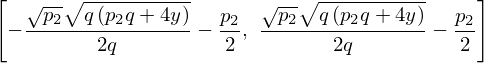

In [6]:
# define a new symbol q
q = symbols('q')
# solve the equation Demand = q, which is equivalent to (Demand - q) = 0. 
#   Notice how we solve for the equation
DInverse = solve(q1star - q, p1)
# note that we have multiple solutions here
DInverse

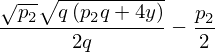

In [7]:
# take the positive solution as quantity
DInverse_plot = DInverse[1]
DInverse_plot

Step 2: plot the demand curve (need to make assumptions about values of exogenous variables)

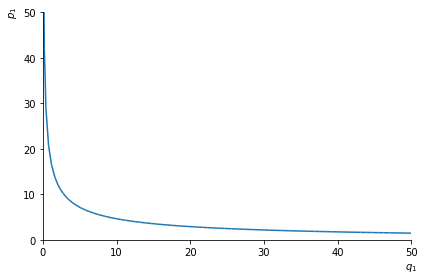

In [46]:
# use plot function
plot(DInverse_plot.subs([(p2,4),(y,Rational(100))]), (q,0,50), xlim=[0,50], ylim=[0,50], xlabel="$q_1$", ylabel="$p_1$")

### Question: plotting Engel curves
1. try to plot an Engel curve for $q_1^*$, make necessary assumptions about the values of the exogenous variables as you need.
1. try to compare two Engel curves as $p_1$ changes. 
1. try to compare two Engel curves as $p_2$ chnages.

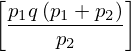

In [8]:
# solve the equation Demand = q, which is equivalent to (Demand - q) = 0. 
#   Notice how we solve for the Engel curve
EngelCurve = solve(q1star - q, y)
# note that we have multiple solutions here
EngelCurve

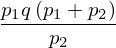

In [9]:
# take the solution as Engel curve
EngelCurve_plot = EngelCurve[0]
EngelCurve_plot

Step 2: plot the Engel curve (need to make assumptions about values of exogenous variables)

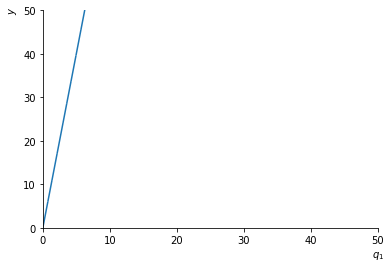

In [11]:
# use plot function
plot(EngelCurve_plot.subs([(p2,4),(p1,4)]), (q,0,50), xlim=[0,50], ylim=[0,50], xlabel="$q_1$", ylabel="$y$")

# 2. Derived labor supply from a CES utility function
Note: see the class handout (on Lyceum) for the graphical solution to this problem

Imagine a "consumer" (household/worker) with preferences represented by a CES utility function over two "goods", leasure ($N$) and income ($w \times H$), where $w$ is the hourly wage rate. They face a resource constraint in time: $$N + H = T,$$ where $T$ is total hours.

### Question: 
* write down the utiltiy maximization problem facing the consumer (household/worker)




\begin{align}
    & \max_{N, H}\quad u(N,wH) = (N^{\rho} + (wH)^{\rho})^{\frac{1}{\rho}} \\
    & \text{s.t.}\quad N + H = T
\end{align}

### Interpreting the problem

We don't see the income as a good in the time constraint now. Let's multiply the time constraint by wage rate $w$.

$$ N + H = T \qquad \Leftrightarrow \qquad wN + wH = wT, $$

which we can reinterpret as prices and quantities

$$\underbrace{w}_{p_1} \times \underbrace{N}_{q_1} + \underbrace{1}_{p_2} \times \underbrace{wH}_{q_2}= \underbrace{wT}_{\text{resource in terms of income}}$$


### Question:
* write down the optimal demand for leasure, income, and working hours, based on the CES solutions 

\begin{align}
    q_1^* &= \frac{p_1^{\sigma}}{p_1^{1+\sigma} + p_2^{1+\sigma}} y \\
    q_2^* &= \frac{p_2^{\sigma}}{p_1^{1+\sigma} + p_2^{1+\sigma}} y
\end{align}

### Answer:
The demands are
\begin{align}
    N^* &= \frac{w^{\sigma}}{w^{1+\sigma} + 1} wT \\
    wH^* &= \frac{1}{w^{1+\sigma} + 1} wT
\end{align}
where the second expression implies
$$ H^* = \frac{1}{w^{1+\sigma} + 1} T $$

### Question:
* If $\rho = 1/2$, i.e., $\sigma = -\frac{1}{1-\rho} = -2$, then what is the optimal labor supply?

### Answer:
The labor supply would be 
\begin{align}
    H^* &= \frac{1}{w^{1+\sigma} + 1} T \\
        &= \frac{1}{w^{-1} + 1} T \\
        &= \frac{1}{\frac{1}{w} + 1} T \\
        &= \frac{1}{\frac{1 + w}{w}} T \\
        &= \frac{w}{w + 1} T
\end{align}

### Question: 
* How does this derived labor supply change with increases in the hourly wage?

Answer:
We use comparative statics to analyze $\frac{\partial H^*}{\partial w}$

In [17]:
# define symbols
w, T = symbols('w T', nonzero=True, positive=True)

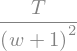

In [19]:
# define the derived labor supply
H = w/(w+1)*T
H.diff(w).simplify()

We found $\frac{\partial H^*}{\partial w} > 0$, meaning that, in this model, labor supply increases as wage increases.

### Question: 
* Consider two workers, one working under a higher wage than the other. Do their labor supply increases more/less/same in response to a small increase in their respecitve wages?

Answer: The answer to this lies in the second derivative, $\frac{\partial^2 H^*}{\partial w^2} = \frac{\partial}{\partial w}\frac{\partial H^*}{\partial w}$

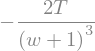

In [20]:
H.diff(w,2).simplify()

The negative second derivative implies that the increase in labor supply due to wage increases diminishes as the wage level increases.

In other words, both a low-wage worker and a high-wage worker increases their labor supply in response to the same raise in their wages. But this response is stronger from the low-wage worker.